Reproduce the precipitation anomaly maps for each WT 
NPL_2022b
 

In [1]:
import sys
import datetime
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import glob 
import os.path
import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# inorder to import my pathon module, add
# $PYTHONPATH for jupyter for module
sys.path.append("/glade/u/home/mingge/PYTHON")
import coexist_func 
from importlib import reload
reload(coexist_func)

from coexist_func import plot_prec_12_erai
from coexist_func import cal_prec_cli_smyle
from coexist_func import cal_prec_cli_wt_smyle
from coexist_func import cal_season_cli_smyle_prec
from coexist_func import cal_season_ano_smyle_prec

In [2]:
# centroid_ana.ibynb, wt_hist_smyle_era5.ipynb
sCentroids='/glade/u/home/mingge/WTing_existing-centroids/CONUS-WTs_existing_centroids.npz'
DATA=np.load(sCentroids)
rgrCentroids=DATA['rgrCentroids']               # (12, 3, 24, 74)
rgiWTs=range(1, rgrCentroids.shape[0]+1, 1)     # number of WT 

lat_s = DATA['rgrLatWT'].min() - 6
lat_e = DATA['rgrLatWT'].max() + 2
lon_s = DATA['rgrLonWT'].min() + 360
lon_e = DATA['rgrLonWT'].max() + 360 + 6
print('lat:', lat_s , '-', lat_e, 'lon:', lon_s, '-', lon_e)

season_dict = {
    'DJF': [12,1,2],
    'MAM': [3,4,5],
    'JJA': [6,7,8],
    'SON': [9,10,11],
    'JAS': [7,8,9]}

n_season = len(season_dict)
n_season = 4

lat: 24.75 - 50.0 lon: 234.75 - 295.5


In [3]:
dir_smyle = '/glade/campaign/cesm/development/espwg/SMYLE/archive/'
dir_o = '/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/' 
dir_wt = '/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/'

year_s = 1979
year_e = 2019
n_year = year_e - year_s + 1

n_mem = 20
 
ini_s = ['02', '05', '08', '11']
n_ini = len(ini_s)

#### calculate prec climatology

In [5]:
# get dimension size info
flnm = dir_smyle + 'b.e21.BSMYLE.f09_g17.2003-02.019//atm/proc/tseries/day_1/b.e21.BSMYLE.f09_g17.2003-02.019.cam.h1.PRECT.20030201-20050131.nc'
with  xr.open_dataset(flnm) as ds:
    prec = ds.PRECT.sel(lat=slice(lat_s, lat_e),lon=slice(lon_s, lon_e))
    lat = ds.lat.sel(lat=slice(lat_s, lat_e))
    lon = ds.lon.sel(lon=slice(lon_s, lon_e))
    n_lat = len(lat)
    n_lon = len(lon)  
    n_fcst =  ds.dims['time']        

In [6]:
flnm_o = dir_o + 'prec_clim_large.nc'
prec_clim_xr = cal_prec_cli_smyle(dir_smyle, n_lat, n_lon, year_s, year_e, lat_s, lat_e, lon_s, lon_e, flnm_o)

/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_clim_large.nc exist


#### precipitation anomalies of WTs

In [7]:
flnm_cli =  dir_o + 'prec_clim_large.nc'
 
cal_prec_cli_wt_smyle(dir_smyle, dir_wt,  year_s, year_e, lat, lon, lat_s, lat_e, lon_s, lon_e)

/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_01.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_02.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_03.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_04.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_05.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_06.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_07.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_08.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_09.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_10.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_11.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_12.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_13.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_14.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_15.nc exist
/glade/cam

#### ensemble average precipitation anomaly maps for each WT

https://www.frontiersin.org/articles/10.3389/fenvs.2019.00036/full

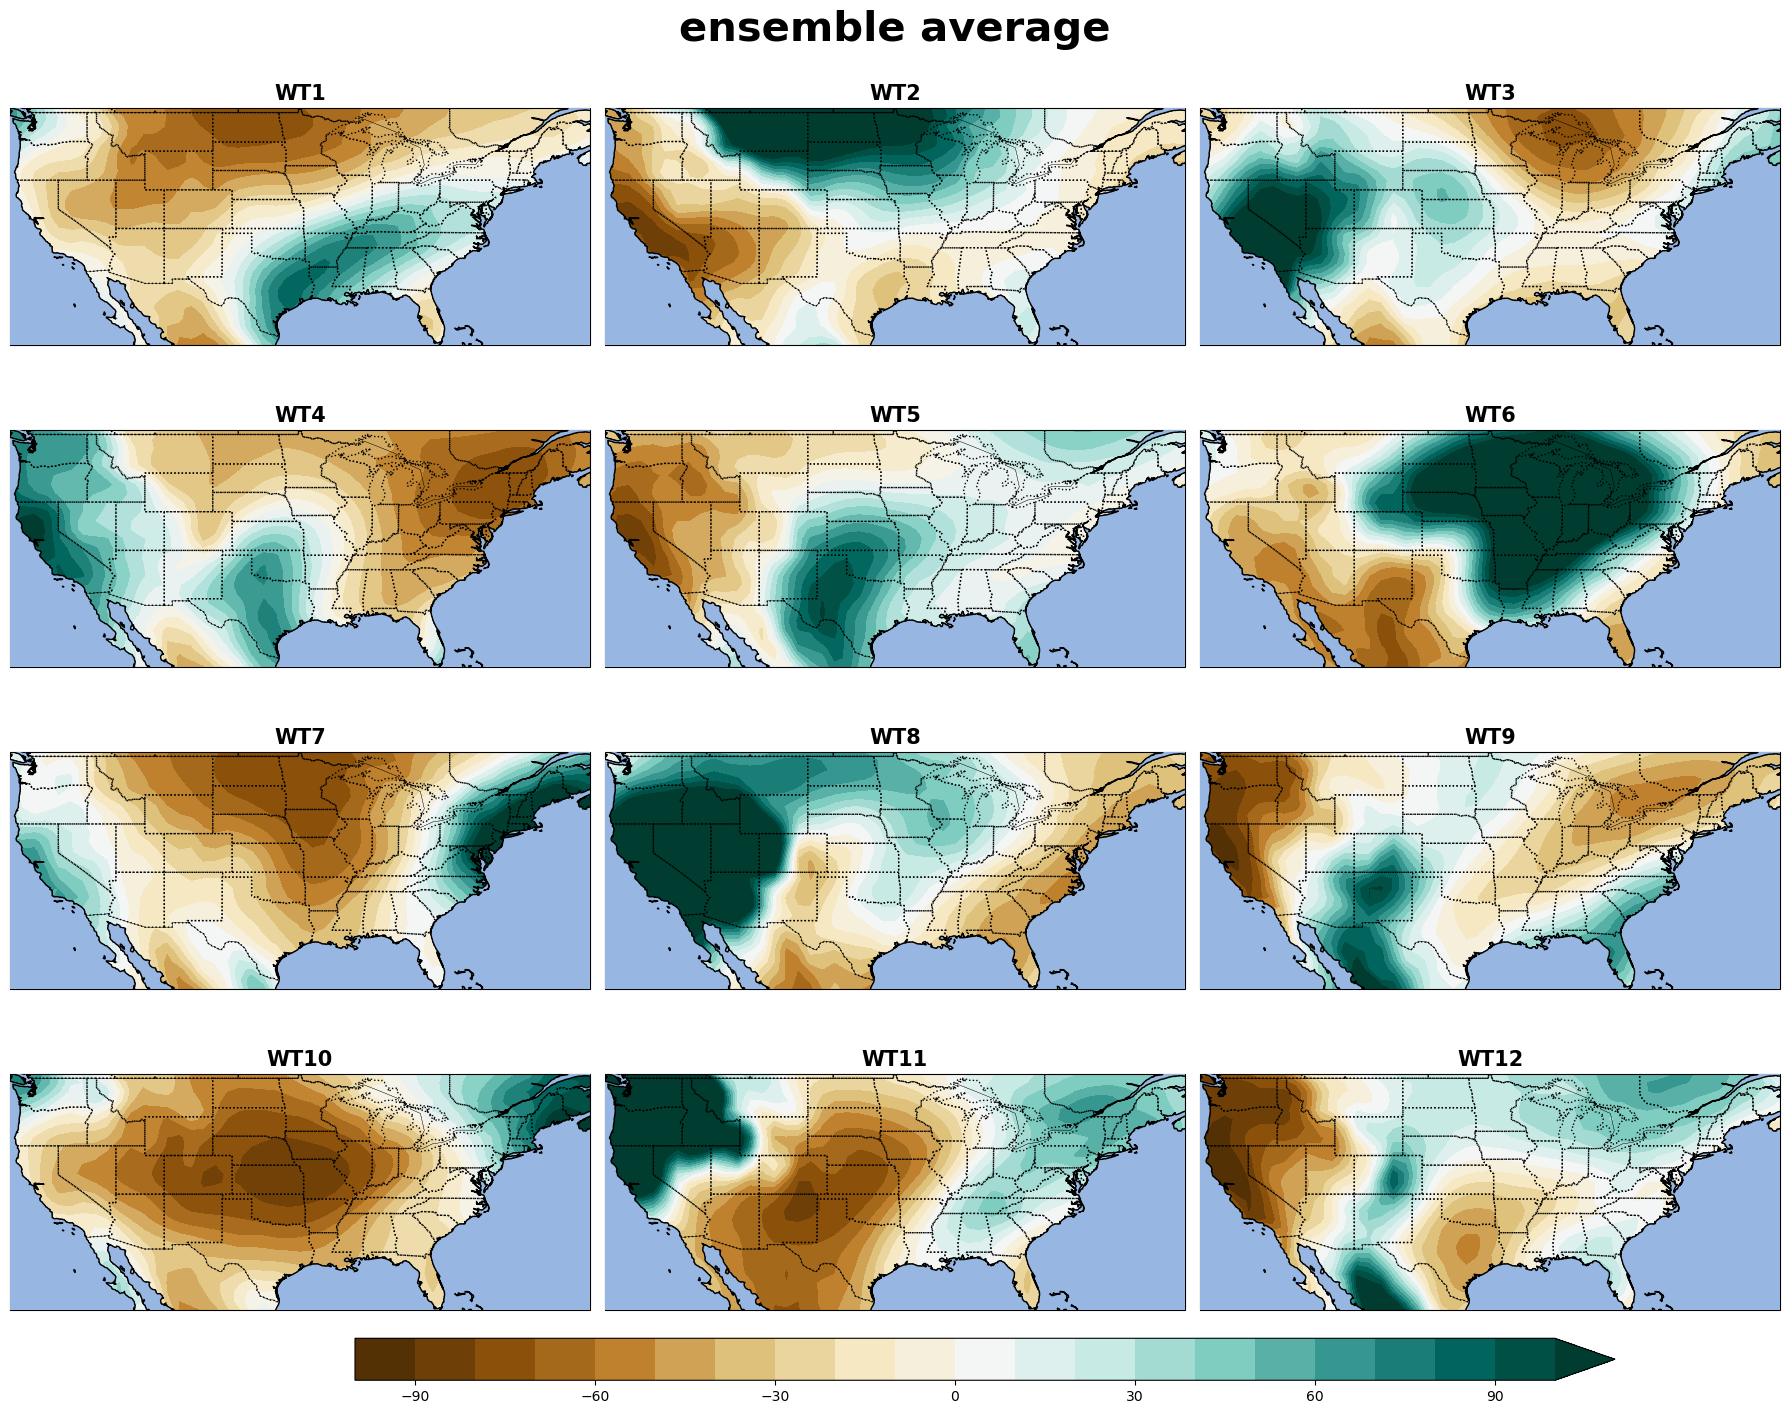

In [8]:
flnm_cli = '/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_clim_large.nc'
with  xr.open_dataset(flnm_cli) as ds_cli:
    prec_cli = ds_cli.PRECT

n_lat = prec_cli.shape[0]
n_lon = prec_cli.shape[1]

for mem in range(1, n_mem+1,1):
    mem_s = str(mem).zfill(2)
    flnm_wt = '/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_wt_' + mem_s + '.nc'
    #print(flnm_wt)
    
    with  xr.open_dataset(flnm_wt) as ds_prec:
        prec_wt = ds_prec.__xarray_dataarray_variable__
        if mem == 1:
            prec_avg = prec_wt.copy()
        else:
            prec_avg = prec_avg + prec_wt

prec_avg = (prec_avg*0.05 - prec_cli)/prec_cli*100
plot_prec_12_erai(prec_avg, -100, 100, 21, 'BrBG', 'horizontal', 'ensemble average')

#### for each ensemble member

#### 2) Precipitation seasonal anomaly of SMYLE
- 2.1) seasonal climatology

In [9]:
flnm_cli = dir_o + 'prec_seasonal_cli.nc'
prec_cli_xr = cal_season_cli_smyle_prec('PRECT', dir_smyle, season_dict, year_s, year_e, lat, lon, lat_s, lat_e, lon_s, lon_e, flnm_cli)

/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/prec_seasonal_cli.nc exist
Frozen({'lat': 27, 'lon': 49, 'season': 4})


-2.2) seasonal anomaly

In [13]:
flnm_cli = dir_o + 'prec_seasonal_cli.nc'
flnm_o = dir_o + 'prec_seasonal_ano.nc'
cal_season_ano_smyle_prec('PRECT', dir_smyle, dir_wt, season_dict, year_s, year_e, lat, lon, lat_s, lat_e, lon_s, lon_e, flnm_cli)

/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/prec_seasonal_ano_mem001.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/prec_seasonal_ano_mem002.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/prec_seasonal_ano_mem003.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/prec_seasonal_ano_mem004.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/prec_seasonal_ano_mem005.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/prec_seasonal_ano_mem006.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/prec_seasonal_ano_mem007.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/prec_seasonal_ano_mem008.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/prec_seasonal_ano_mem009.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/prec_seasonal_ano_mem010.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/SMYLE/WT_init/prec_seasonal_ano_mem011.nc exist
/glade/campaign/mmm/c3we/mingge/

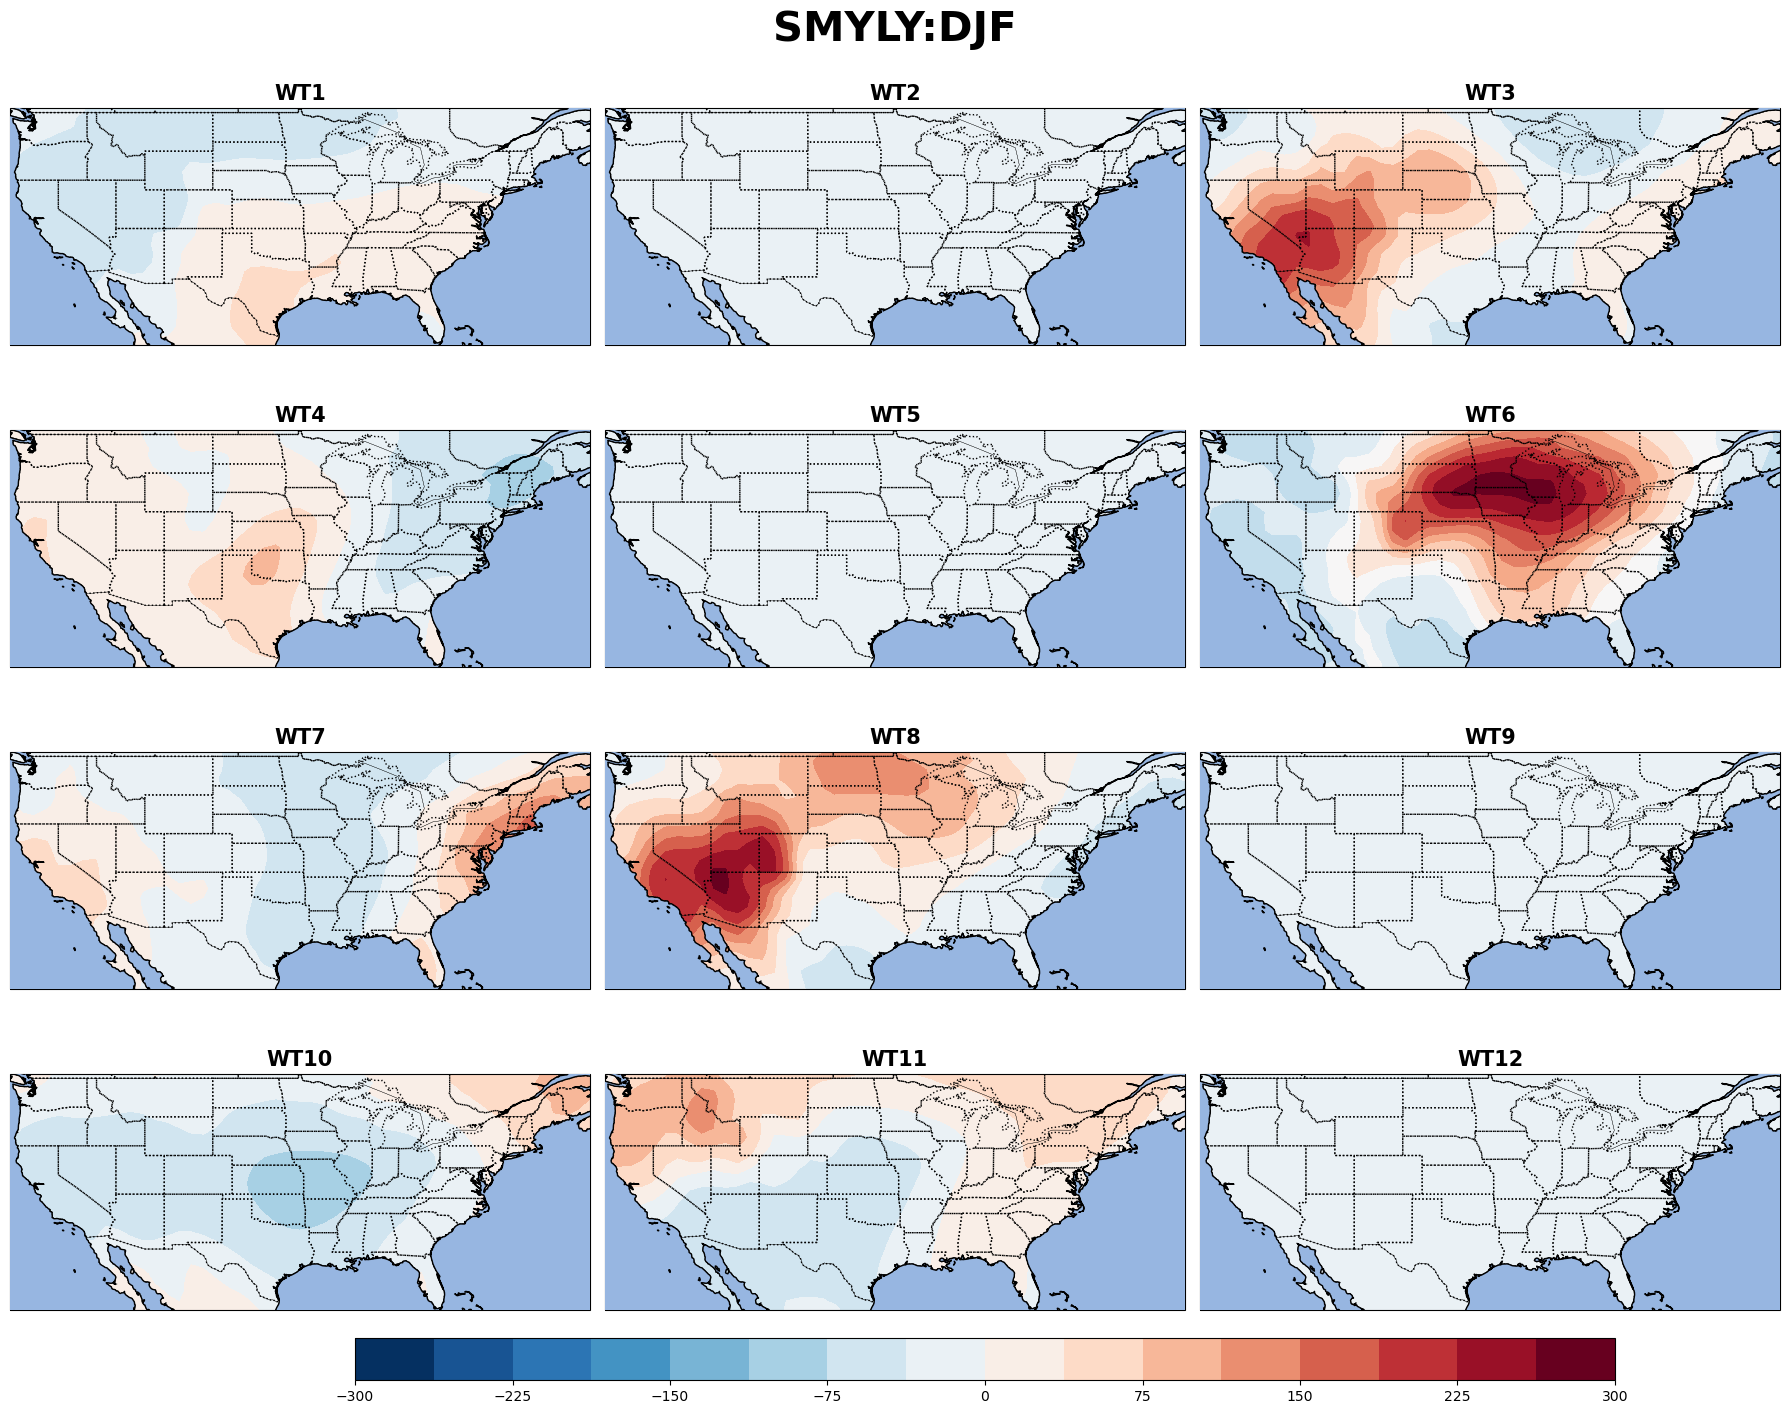

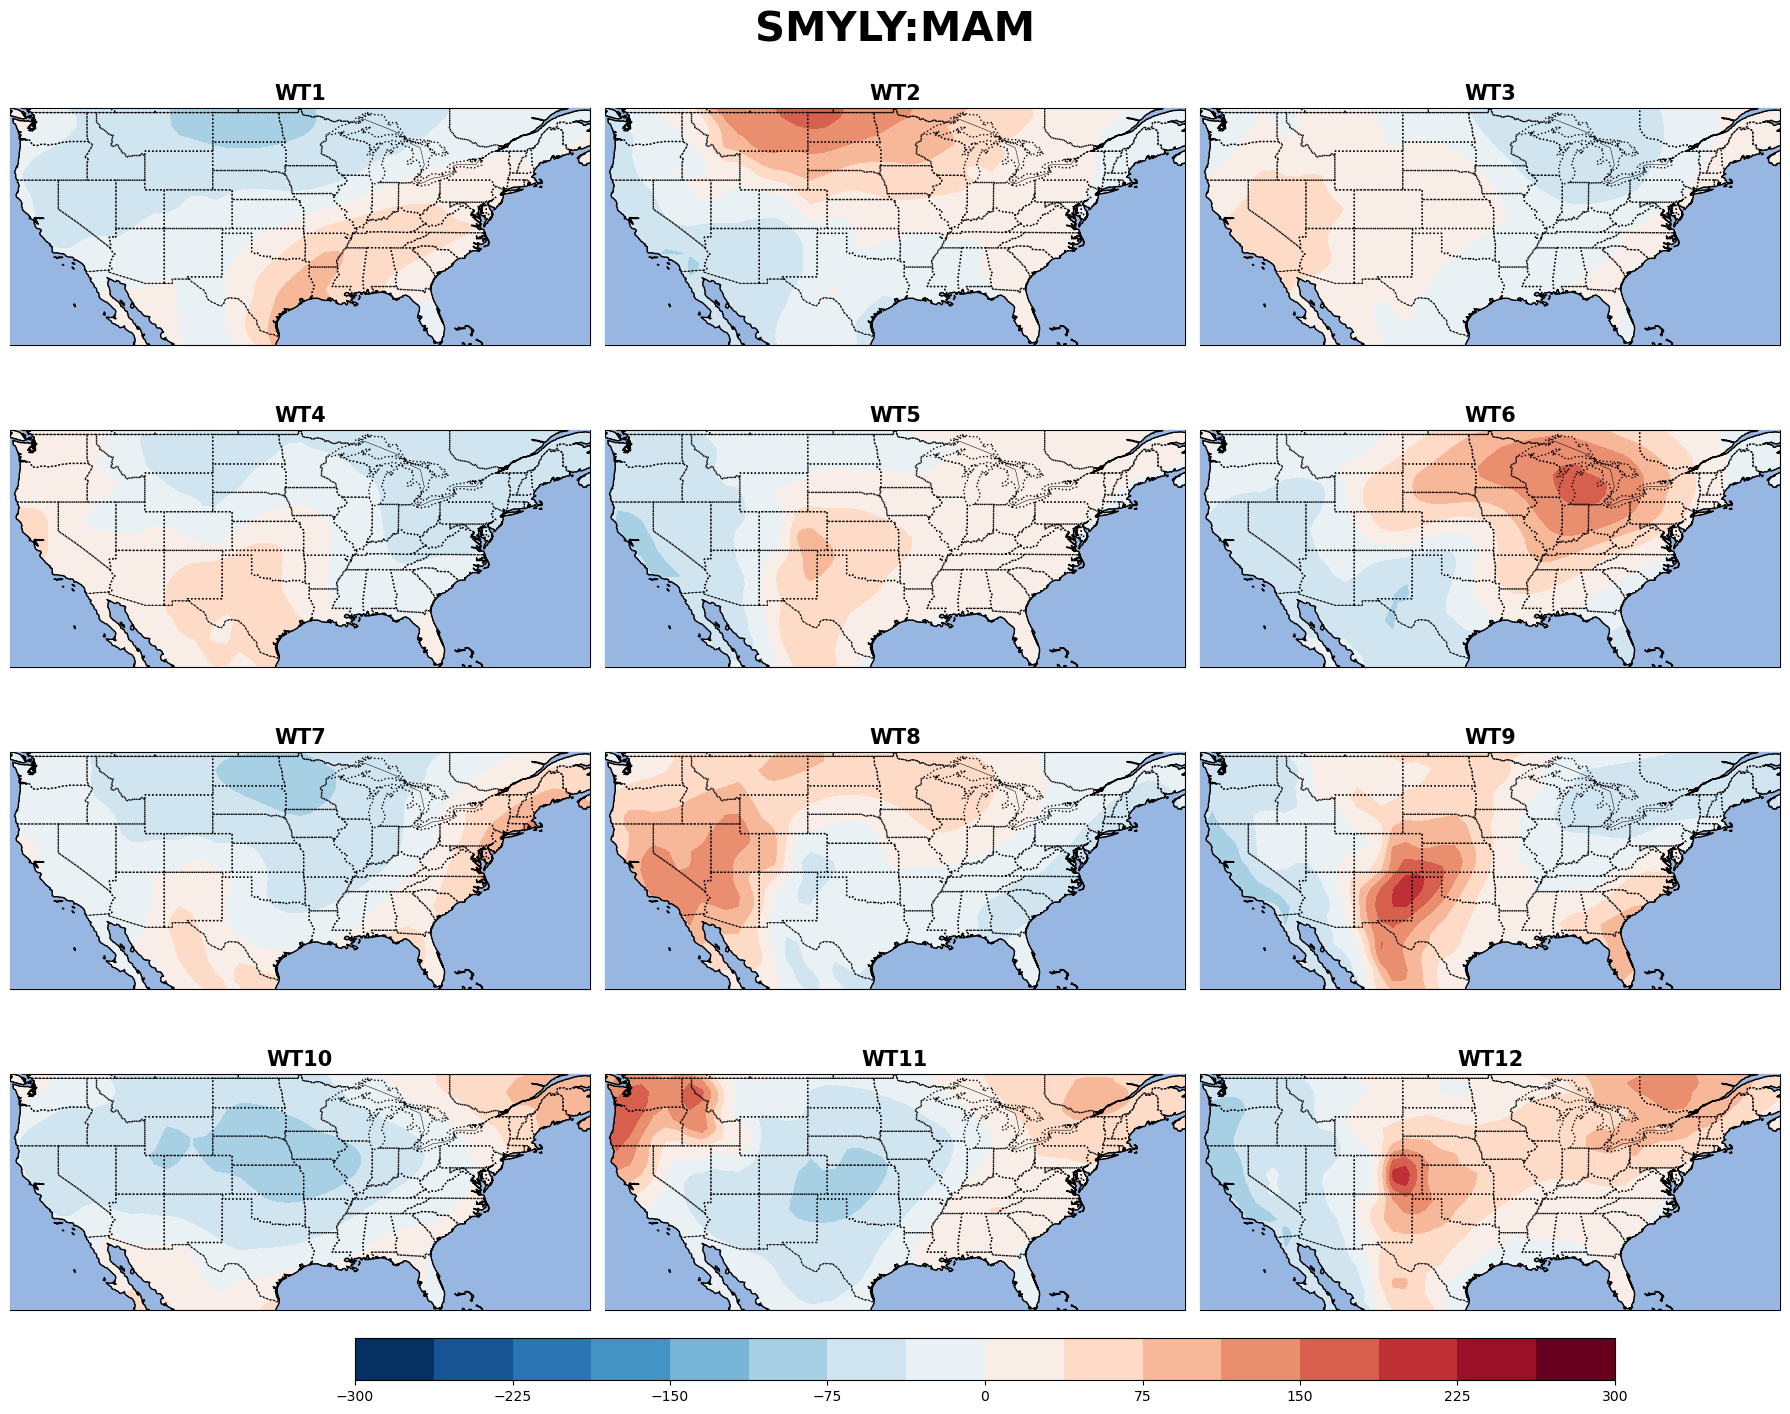

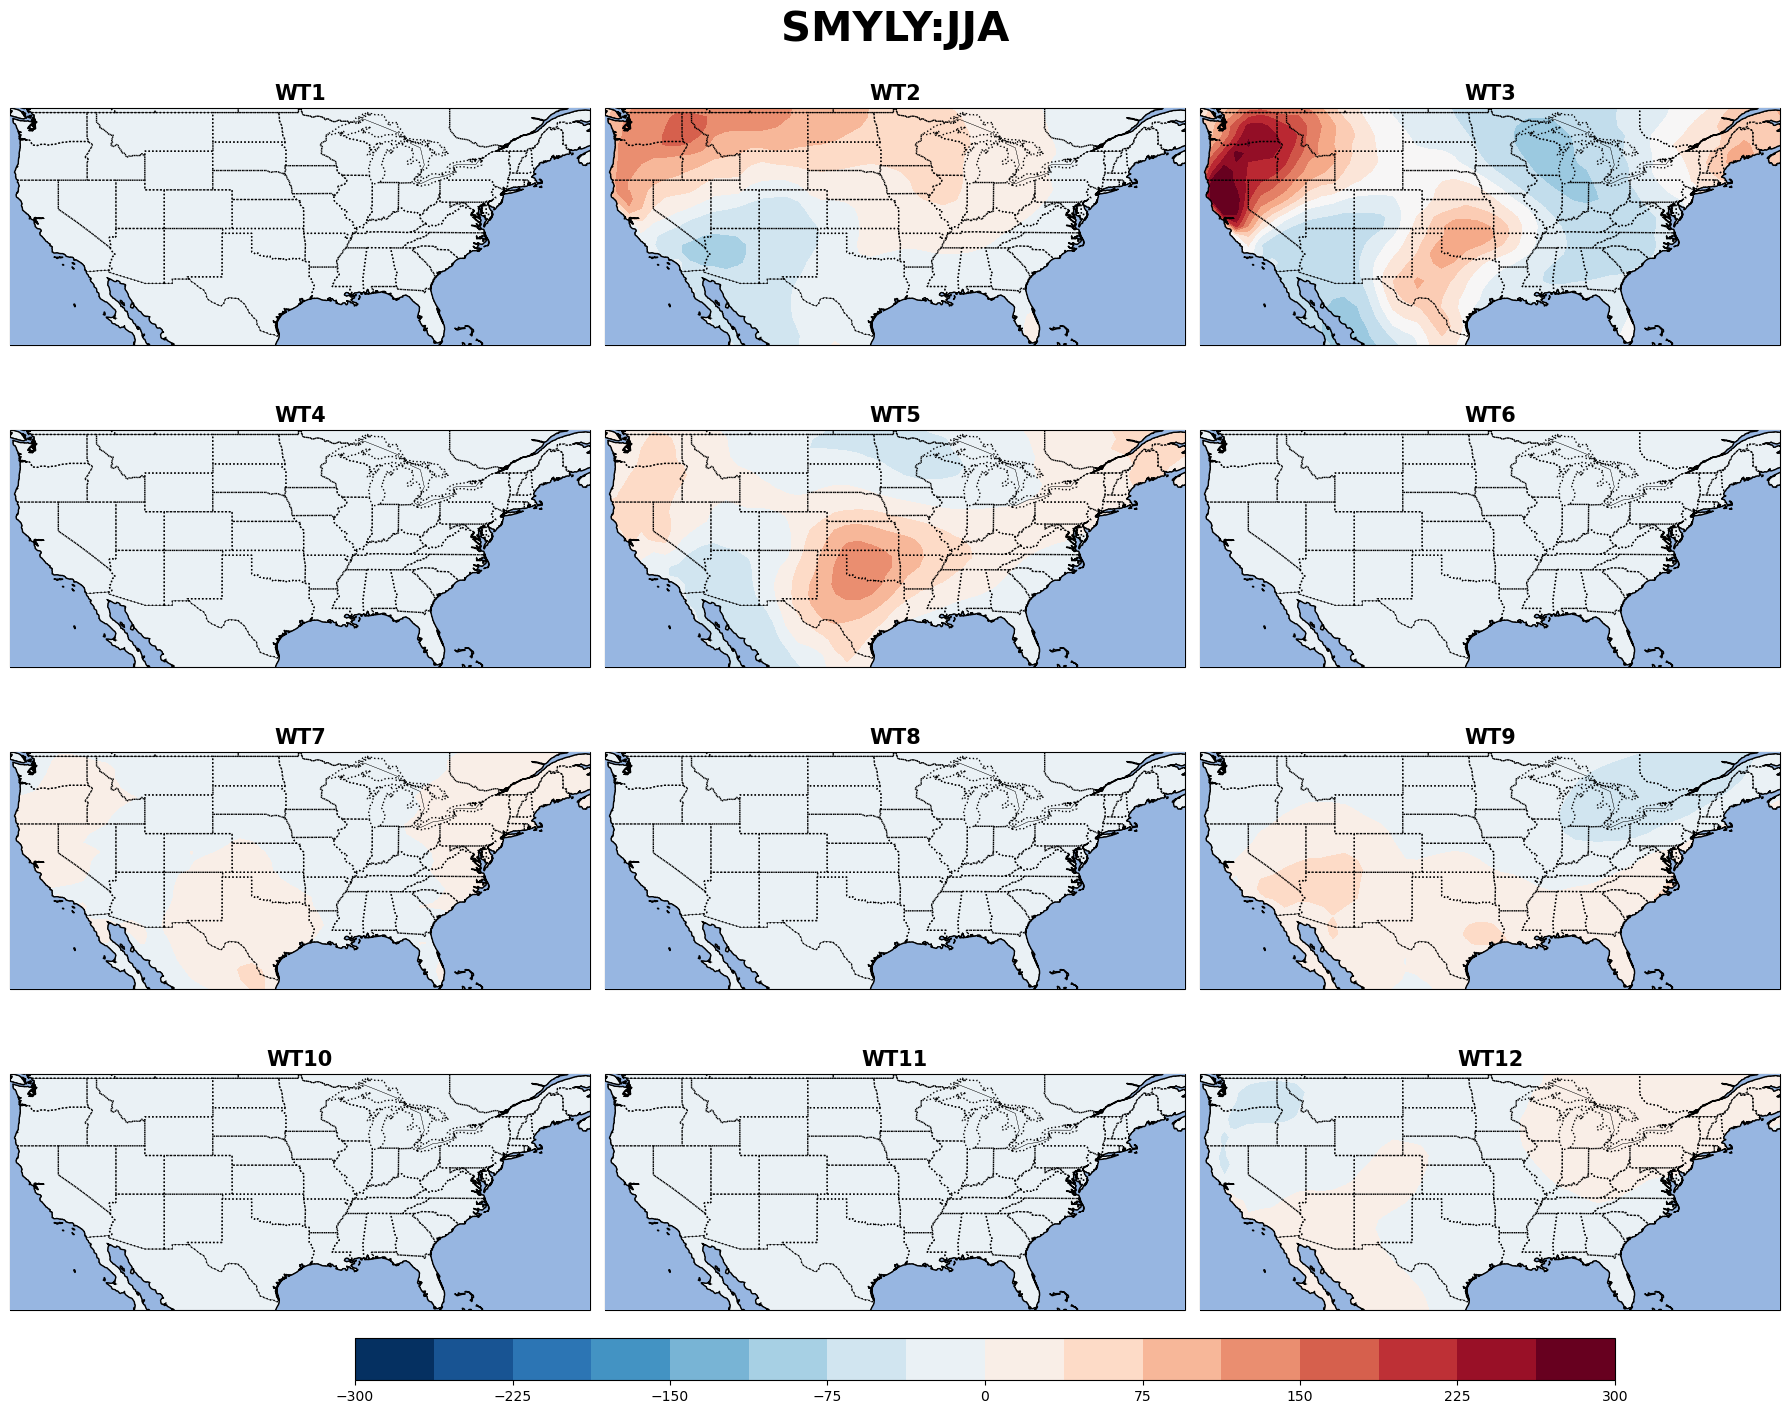

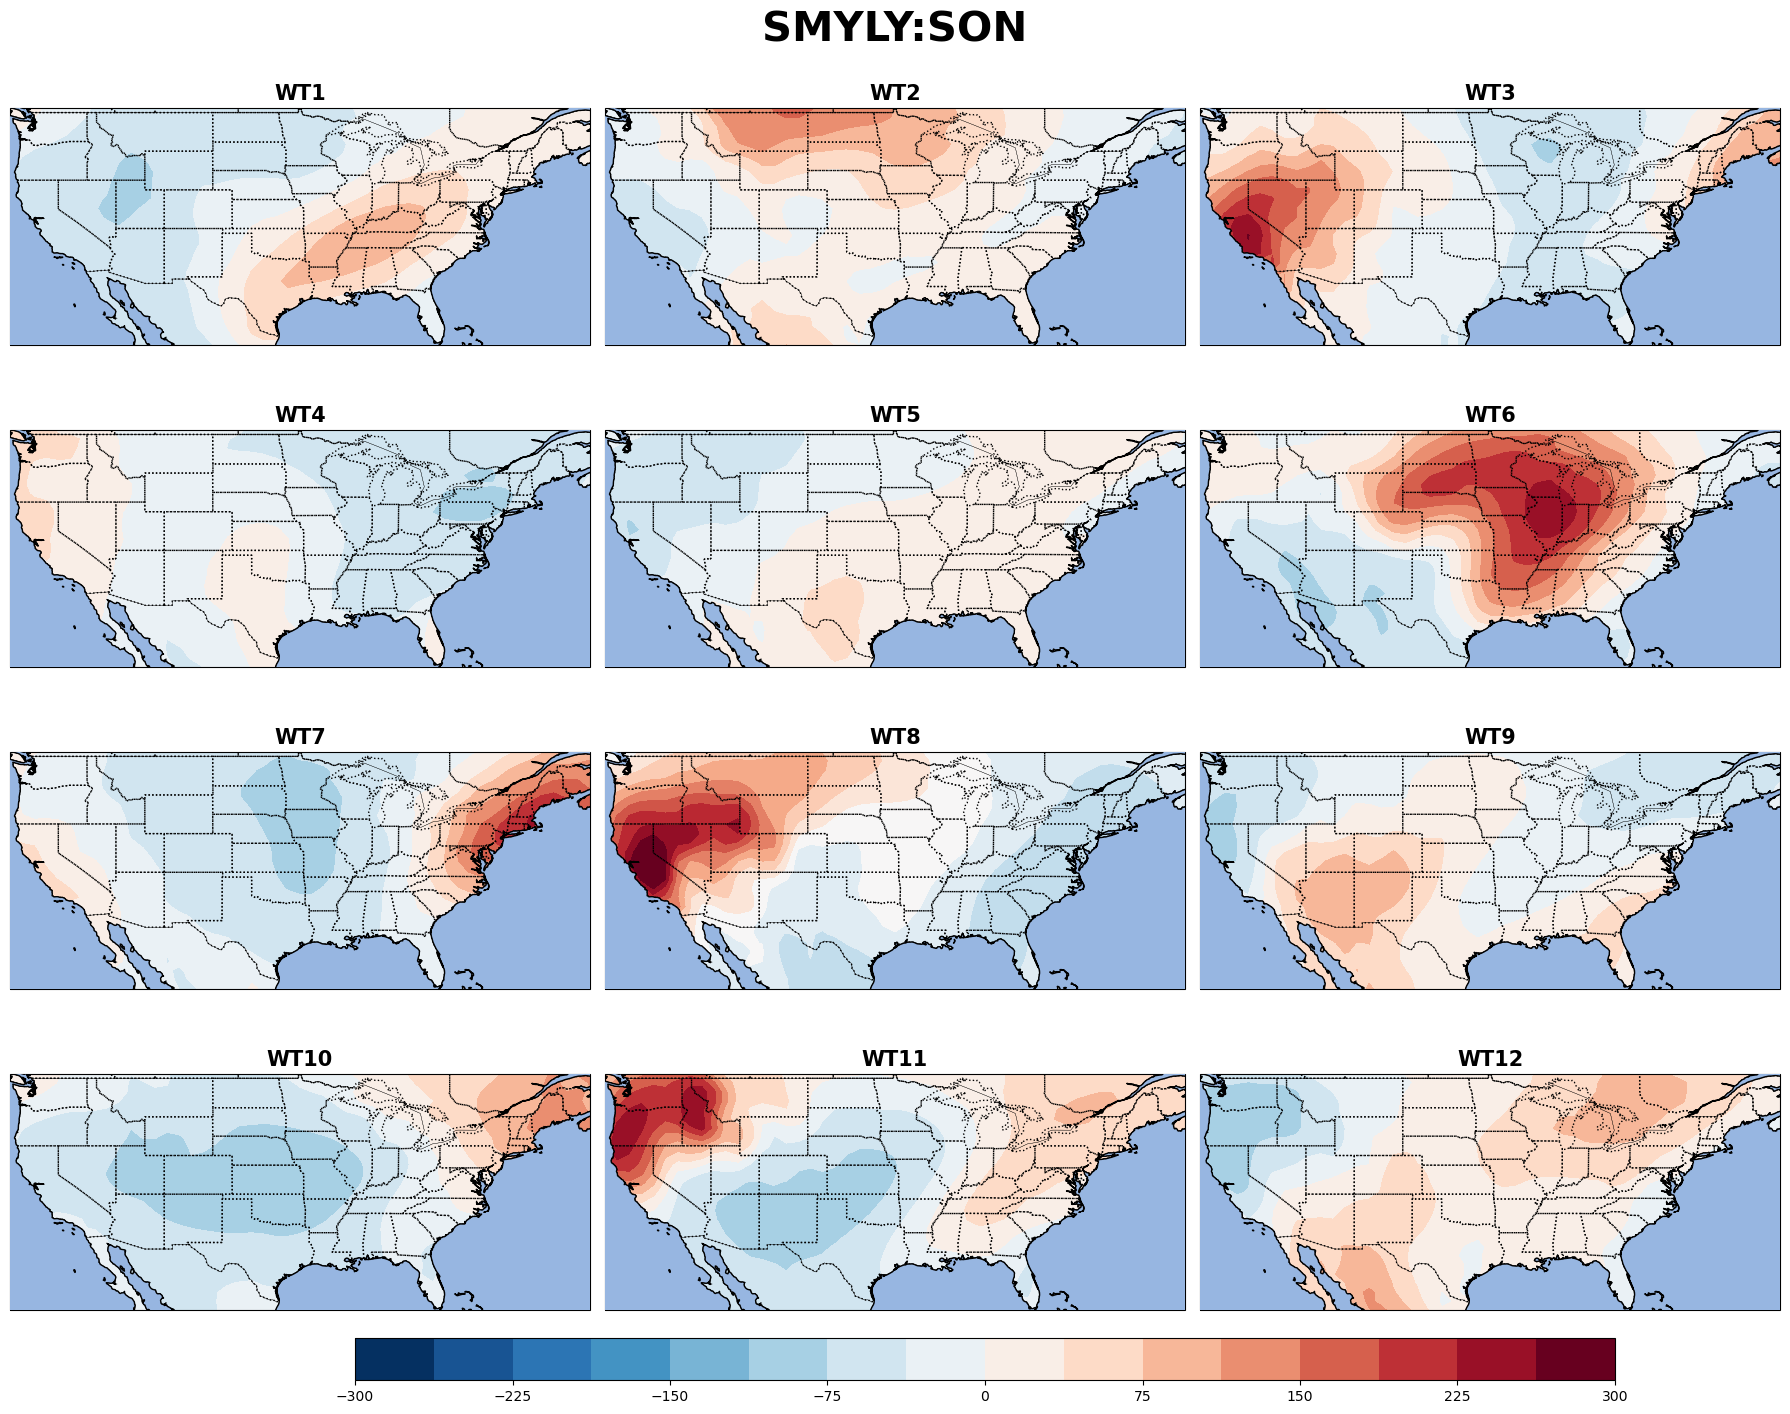

In [21]:
for mem in range(1,21):
    mem_s = str(mem).zfill(3) 
    flnm = dir_wt + 'prec_seasonal_ano_mem' + mem_s + '.nc'
    mem_s = str(mem).zfill(2) 
    with  xr.open_dataset(flnm) as ds:
        # proj = ccrs.PlateCarree(central_longitude=180)
        # longitude from [-180, 180] -> [0,360]
        #ds.coords['longitude'] = xr.where(ds['longitude'] < 0, ds['longitude'] + 360, ds['longitude'])
        #ds = ds.sortby(ds.longitude)
        if mem == 1: 
            z500_wt = ds.__xarray_dataarray_variable__
        else:
            z500_wt = z500_wt + ds.__xarray_dataarray_variable__

season_s = ['DJF','MAM','JJA','SON']            
 
# Because proj = ccrs.PlateCarree(central_longitude=180)
# I need to convert longitude from [-180, 180] -> [0,360]
#z500_wt.coords['lon'] = xr.where(z500_wt['lon'] < 0, z500_wt['lon'] + 360, z500_wt['lon'])
#z500_wt = z500_wt.sortby(z500_wt.lon)
 
z500_wt = z500_wt/20*100
 
for ns in range(4): 
     plot_prec_12_erai(z500_wt[:,ns], -300, 300, 17, 'RdBu_r', 'horizontal', 'SMYLY:' + season_s[ns]);

In [16]:
print(z500_wt[1,1:,:])

<xarray.DataArray '__xarray_dataarray_variable__' (season: 3, lat: 27, lon: 49)>
array([[[-42.53899854, -41.70420478, -40.56546021, ...,  21.97617031,
          21.55522815,  21.16095928],
        [-44.29872137, -43.5126222 , -42.99957096, ...,  19.46673926,
          19.55019119,  19.45877698],
        [-46.91795339, -45.96392056, -45.47380674, ...,  15.45425275,
          16.21512825,  16.45194351],
        ...,
        [-41.89263691, -42.42395284, -36.1179717 , ..., -10.84137773,
         -13.83028075, -16.46852576],
        [-42.44330238, -39.54134112, -31.64168813, ...,  -9.1868556 ,
         -11.76176022, -15.02212893],
        [-39.80292334, -35.89505403, -30.72792008, ..., -10.62684452,
         -13.13525972, -15.53075292]],

       [[-16.51167621, -19.54372806, -23.11549632, ...,   2.61747912,
           2.11195404,   1.35368677],
        [-15.98104131, -19.27215851, -23.00721608, ...,   9.18932468,
           8.30367287,   7.3591626 ],
        [-16.68895574, -21.09759981, -24